# Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
labels = pd.read_csv("./labels_all.csv")
labels

,NEURON,ID,NAME
0,0,2,Cinnamomum camphora
1,1,774,Ilex latifolia
2,2,1030,Ginkgo biloba
3,3,136,Photinia serratifolia
4,4,265,Quercus palustris
5,5,655,Idesia polycarpa
6,6,274,Quercus rhoifolia
7,7,915,Cornus florida
8,8,277,Liriodendron chinense
9,9,545,Liquidambar formosana


In [3]:
result = pd.read_csv("./result.csv", header=None, names=["True", "Pred"])
result.head()

,True,Pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [103]:
mat = result.values
a, b = np.hsplit(mat, 2)
np.sum(a==b)/a.shape[0]

0.990625

In [4]:
lb = list(labels["NAME"])
lb

['Cinnamomum camphora',
 'Ilex latifolia',
 'Ginkgo\xa0 biloba',
 'Photinia serratifolia',
 'Quercus palustris',
 'Idesia polycarpa',
 'Quercus rhoifolia',
 'Cornus florida',
 'Liriodendron chinense',
 'Liquidambar formosana',
 'Robinia pseudoacacia',
 'Lithocarpus edulis',
 'Paulownia tomentosa',
 'Quercus serrata',
 'Triadica sebifera',
 'Styphnolobium japonicum',
 'Cydonia oblonga',
 'Firmiana simplex',
 'Liquidambar styraciflua',
 'Quercus glauca',
 'Ehretia dicksonii\xa0',
 'Prunus zippeliana ',
 'Prunus serrulata',
 'Magnolia grandiflora']

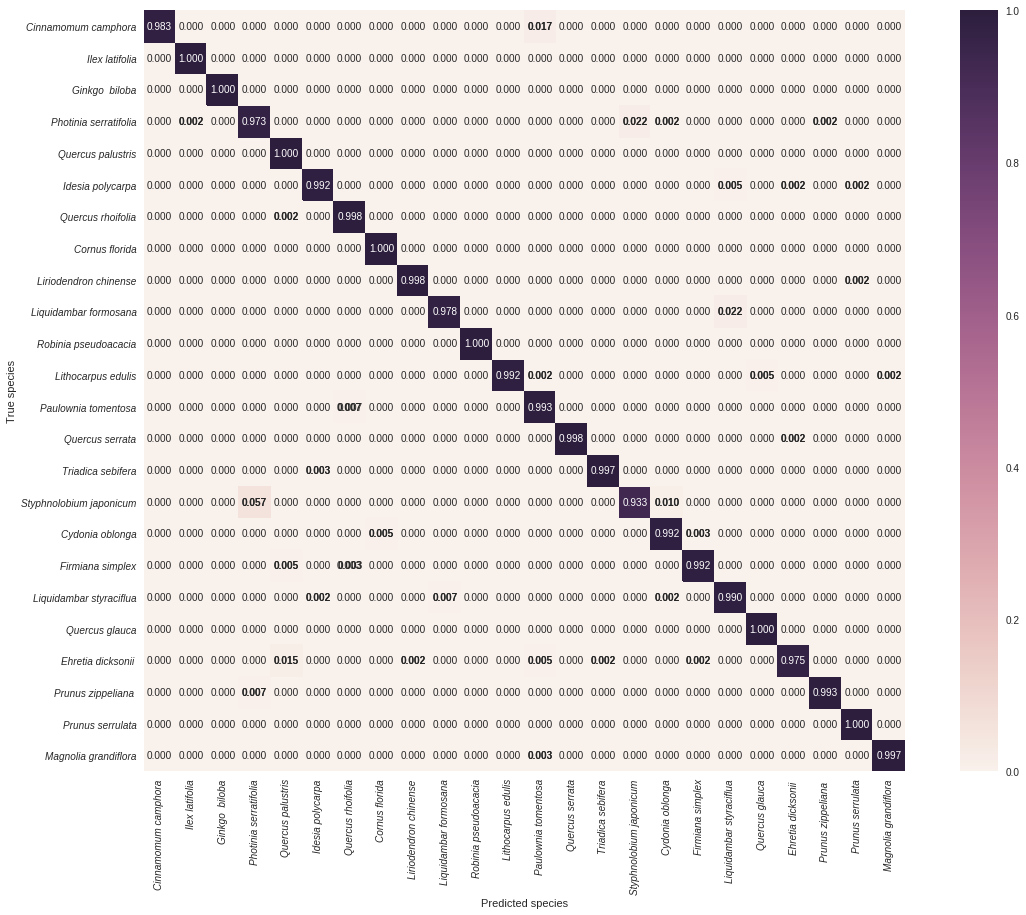

In [5]:
matrix = confusion_matrix(result["True"], result["Pred"])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20,14))
ax = sns.heatmap(matrix, annot=True, fmt='.3f', square=True, xticklabels=lb, yticklabels=lb)
for text in ax.get_xticklabels():
    text.set_style('italic')
for text in ax.get_yticklabels():
    text.set_style('italic')    
ax = sns.heatmap(matrix, annot=True, fmt='.3f', square=True, xticklabels=lb, yticklabels=lb, mask=np.where((matrix>0)&(matrix<0.1), 0,1),annot_kws={"weight": "bold"}, cbar=None)
for text in ax.get_xticklabels():
    text.set_style('italic')
for text in ax.get_yticklabels():
    text.set_style('italic')  
plt.xlabel("Predicted species")
plt.ylabel("True species")
# plt.show()
plt.savefig("confusion_matrix.png", format='png', dpi=300,bbox_inches="tight")